# Exercise 1.2

## a)
The actual rewards change over time, which could be modelled using a mathematical function on the number of pulls. A possible algorithmic solution should weigh the results from recent pulls greater than those which lie further in the past. Our approach is an exponentially decreasing weight distribution, assigning a weight of 1 to the most recent pull and a weight close to 0 to the first one. This way, we do not need to assume anything about the change of probability over time, while still not relying on outdated data.
Exploration needs to be prioritised in this case, since there is never a point at which one bandit can be exploited with certainty. A decreasing epsilon is thus not a valid approach, as it assumes that the accuracy of the reward estimation increases over time.
The algorithms can be evaluated by calculating the total reward over a great number of pulls, and by analysing how quickly the algorithm adapts to changes in the bandit probability.

## b)
Adjusting the bandit problem to be nonstationary: Let all initial means be the same value, lets say 0.5. We will change the means of the bandits over time by adding random values based on a normal distribution with mean 0 and standard deviation 0.01. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bandits
bandits = {
    0: {'probability': 0.5},
    1: {'probability': 0.5},
    2: {'probability': 0.5},
    3: {'probability': 0.5}
}

# Print the probability of each bandit
for bandit in bandits:
    print(f"Probability of bandit {bandit}: {bandits[bandit]['probability']}")

# Print the number of bandits
num_bandits = len(bandits)
print("Number of bandits: ", num_bandits)

# Print number of pulls
num_pulls = 2000
print("Number of pulls: ", num_pulls)

Probability of bandit 0: 0.5
Probability of bandit 1: 0.5
Probability of bandit 2: 0.5
Probability of bandit 3: 0.5
Number of bandits:  4
Number of pulls:  2000


## c) 
We will now use the epsilon-greedy algorithm to solve the non-stationary bandit problem. We will use a epsilon of 0.1. We will plot the reward and the regret over time. We will also plot the percentage of all bandits chosen over time. 

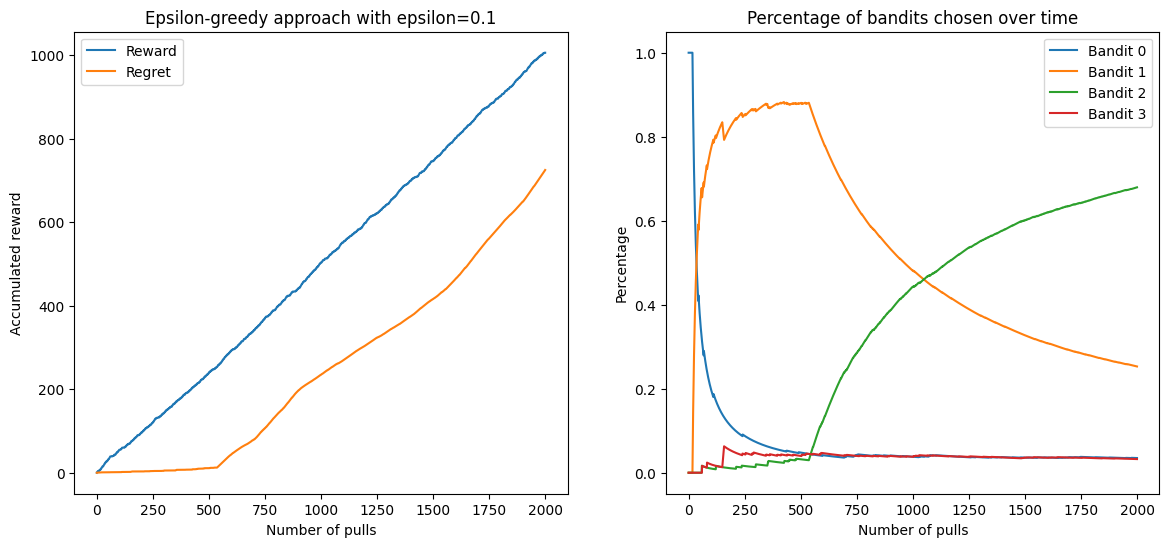

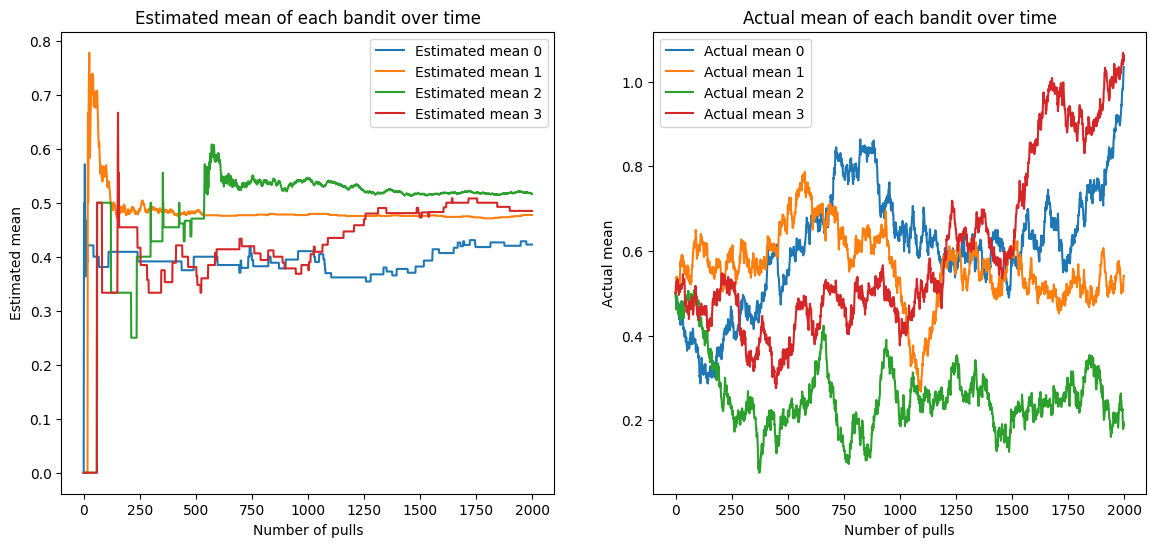

<Figure size 640x480 with 0 Axes>

In [3]:
# Epsilon-Greedy Algorithm with non-stationary bandits

import random

# Function to simulate pulling a bandit
def pull_bandit(bandit_number):
    bandit = bandits[bandit_number]
    if random.random() < bandit['probability']:
        return 1
    else:
        return 0

def run_epsilon_greedy(num_pulls=2000, epsilon=0.1, num_bandits=4, estimated_means=None):
    
    # Initialize reward
    total_reward = 0
    reward = np.zeros(num_pulls)

    # Initialize regret
    total_regret = 0
    regret = np.zeros(num_pulls)
    
    # Initialize estimated means 
    if estimated_means is None:
        estimated_means = np.zeros(num_bandits)
        estimated_means_over_time = np.zeros((num_bandits, num_pulls))
    else:
        estimated_means_over_time = np.zeros((num_bandits, num_pulls))
        estimated_means_over_time[:, 0] = estimated_means
    num_selections = np.ones(num_bandits)

    # Initialize actual means
    actual_means = [bandits[bandit]['probability'] for bandit in bandits]
    actual_means_over_time = np.zeros((num_bandits, num_pulls))

    # Initialize chosen bandits
    total_pulls = 0
    chosen_bandits = np.zeros(num_bandits)
    chosen_bandits_percentage = np.zeros((num_bandits, num_pulls))

    for i in range(num_pulls):
        total_pulls += 1
        actual_best_bandit = np.argmax(actual_means)

        if np.random.random() < epsilon:
            # Explore
            select_bandit = np.random.randint(num_bandits)
        else:
            # Exploit
            select_bandit = np.argmax(estimated_means) # select best bandit based on current estimated means

        # Compute reward 
        tmp_reward = pull_bandit(select_bandit)
        total_reward += tmp_reward
        reward[i] = total_reward

        # Compute regret
        tmp_regret = 0 if select_bandit == actual_best_bandit else actual_means[actual_best_bandit] - actual_means[select_bandit]
        total_regret += tmp_regret
        regret[i] = total_regret
        
        # Update the estimated means
        num_selections[select_bandit] += 1
        estimated_means[select_bandit] += 1/num_selections[select_bandit] * (tmp_reward - estimated_means[select_bandit])
        # Update the estimated means over time
        for bandit in range(num_bandits):
            estimated_means_over_time[bandit, i] = estimated_means[bandit]
            actual_means_over_time[bandit, i] = actual_means[bandit]

        # Add to chosen bandits
        chosen_bandits[select_bandit] += 1
        for bandit in bandits:
            chosen_bandits_percentage[bandit, i] = chosen_bandits[bandit] / total_pulls

        # Change the probability of all the bandits over time
        for bandit in bandits:
            actual_means[bandit] += np.random.normal(0, 0.01)

    return reward, regret, epsilon, chosen_bandits_percentage, estimated_means_over_time, actual_means_over_time


reward, regret, epsilon, chosen_bandits_percentage, estimated_means_over_time, actual_means_over_time = run_epsilon_greedy()


# Plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot reward and regret in the first subplot
axs[0].plot(reward, label="Reward")
axs[0].plot(regret, label="Regret")
axs[0].set_xlabel("Number of pulls")
axs[0].set_ylabel("Accumulated reward")
axs[0].set_title(f"Epsilon-greedy approach with epsilon={epsilon}")
axs[0].legend()

# Plot percentage of bandits chosen in the second subplot
axs[1].plot(chosen_bandits_percentage[0], label="Bandit 0")
axs[1].plot(chosen_bandits_percentage[1], label="Bandit 1")
axs[1].plot(chosen_bandits_percentage[2], label="Bandit 2")
axs[1].plot(chosen_bandits_percentage[3], label="Bandit 3")
axs[1].set_xlabel("Number of pulls")
axs[1].set_ylabel("Percentage")
axs[1].set_title("Percentage of bandits chosen over time")
axs[1].legend()

# Plot estimated means and actual means in two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot estimated means in the first subplot
axs[0].plot(estimated_means_over_time[0], label="Estimated mean 0")
axs[0].plot(estimated_means_over_time[1], label="Estimated mean 1")
axs[0].plot(estimated_means_over_time[2], label="Estimated mean 2")
axs[0].plot(estimated_means_over_time[3], label="Estimated mean 3")
axs[0].set_xlabel("Number of pulls")
axs[0].set_ylabel("Estimated mean")
axs[0].set_title("Estimated mean of each bandit over time")
axs[0].legend()

# Plot actual means in the second subplot
axs[1].plot(actual_means_over_time[0], label="Actual mean 0")
axs[1].plot(actual_means_over_time[1], label="Actual mean 1")
axs[1].plot(actual_means_over_time[2], label="Actual mean 2")
axs[1].plot(actual_means_over_time[3], label="Actual mean 3")
axs[1].set_xlabel("Number of pulls")
axs[1].set_ylabel("Actual mean")
axs[1].set_title("Actual mean of each bandit over time")
axs[1].legend()

plt.show() 

plt.tight_layout()
plt.show()


As we can see, the epsilon-greedy algorithm has a tough time adapting to the changing environment. The estimated means are not able to adapt to the changing actual means of the bandits. Therefore we see a very high regret, which sometimes even overtakes the reward. 

## d)
Possible adjustments to the epsilon-greedy algorithm to improve its performance for the non-stationary bandit problem: 

- We could use a dynamic epsilon value over time, such that the algorithm does more exploring in the non-stationary environment. 
- We could give more weight to the more recent data points, since old information might not be as important. 
- We could use a different algorithm that is better suited for non-stationary bandit problems. 
- All in all: We should try balancing the exploitation of learned information while not neglecting the exploration in a shifting environment. 

